## Data Driven House Price Analysis and Prediction – Group Hackathon

This notebook forms part of a group hackathon project focused on understanding and predicting residential house prices using data analytics and machine learning techniques.

The analysis uses a cleaned and feature-engineered version of the **Ames Housing dataset**, which contains historical records of residential property sales in **Ames, Iowa (United States)**. The dataset includes information on property size, quality, age, sale conditions, and neighbourhood, with the target variable representing the final sale price.

This notebook focuses on **exploratory data analysis (EDA)** and **basic statistical analysis**. The goal is to understand the structure and characteristics of the dataset, identify key features that influence sale price, and provide evidence-based insight to inform later modelling and dashboard development.

### Contents
0. Setup & imports
1. Data overview and quality validation
2. Single variable analysis
3. Relationship analysis
4. Statistical summary

## 0.0 SET UP AND IMPORTS

In [31]:
# Set project root

import os
from pathlib import Path

current_dir = Path(os.getcwd())
project_root = current_dir

if project_root.name.lower() == "notebooks":
    project_root = project_root.parent
    os.chdir(project_root)

In [32]:
import pandas as pd

train_df = pd.read_csv("data/raw/Cleaned train.csv")
test_df = pd.read_csv("data/raw/Cleaned test.csv")

## 1.0 DATA OVERVIEW AND QUALITY VALIDATION 

## 1.1 Data quality
Although the dataset provided has undergone prior cleaning and transformation, a series of validation checks were performed to confirm data integrity, consistency, and suitability for exploratory data analysis and statistical testing.

In [44]:
# shape and structure of data
train_df.shape, test_df.shape

((1458, 380), (1459, 379))

In [63]:
train_df.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Saleprice
0,1,18.144573,13.833054,7,3.991517,2003,2003,19.433175,144.117862,0.0,...,0,0,1,0,0,0,0,1,0,208501.0
1,2,20.673625,14.117918,6,6.000033,1976,1976,54.598150,181.719186,0.0,...,0,0,1,0,0,0,0,1,0,181501.0
2,3,18.668047,14.476512,7,3.991517,2001,2002,17.768840,110.441033,0.0,...,0,0,1,0,0,0,0,1,0,223501.0
3,4,17.249651,14.106196,7,3.991517,1915,1970,54.598150,61.795315,0.0,...,0,0,1,1,0,0,0,0,0,140001.0
4,5,21.314283,15.022008,8,3.991517,2000,2000,25.404164,136.624601,0.0,...,0,0,1,0,0,0,0,1,0,250001.0


In [64]:
train_df.columns

Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_Abnorml',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial', 'Saleprice'],
      dtype='object', length=380)

In [77]:
# Data dictionary for train and test column review
train_dict = pd.DataFrame({
    "Column": train_df.columns,
    "DataType": train_df.dtypes.astype(str),
    "NonNullCount": train_df.notna().sum()
}).reset_index(drop=True)

test_dict = pd.DataFrame({
    "Column": test_df.columns,
    "DataType": test_df.dtypes.astype(str),
    "NonNullCount": test_df.notna().sum()
}).reset_index(drop=True)

train_dict.head(10), test_dict.head(10)

(         Column DataType  NonNullCount
 0            Id    int64          1458
 1   LotFrontage  float64          1458
 2       LotArea  float64          1458
 3   OverallQual    int64          1458
 4   OverallCond  float64          1458
 5     YearBuilt    int64          1458
 6  YearRemodAdd    int64          1458
 7    MasVnrArea  float64          1458
 8    BsmtFinSF1  float64          1458
 9    BsmtFinSF2  float64          1458,
          Column DataType  NonNullCount
 0            Id    int64          1459
 1   LotFrontage  float64          1459
 2       LotArea  float64          1459
 3   OverallQual    int64          1459
 4   OverallCond  float64          1459
 5     YearBuilt    int64          1459
 6  YearRemodAdd    int64          1459
 7    MasVnrArea  float64          1459
 8    BsmtFinSF1  float64          1459
 9    BsmtFinSF2  float64          1459)

In [65]:
# check data types
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Columns: 380 entries, Id to Saleprice
dtypes: float64(71), int64(309)
memory usage: 4.2 MB


In [71]:
# check missing values
train_df.isna().sum().sort_values(ascending=False).head()

Id                 0
BsmtQual_Gd        0
BsmtExposure_Gd    0
BsmtExposure_Av    0
BsmtCond_TA        0
dtype: int64

In [132]:
# check dataset time span
print("YearBuilt:", train_df["YearBuilt"].min(), "to", train_df["YearBuilt"].max())
print("YearRemodAdd:", train_df["YearRemodAdd"].min(), "to", train_df["YearRemodAdd"].max())

YearBuilt: 1872 to 2010
YearRemodAdd: 1950 to 2010


In [69]:
train_df["Saleprice"].head()

0    208501.0
1    181501.0
2    223501.0
3    140001.0
4    250001.0
Name: Saleprice, dtype: float64

## 1.2 Dataset overview and column descriptions

This dataset is a pre-processed version of the Ames Housing dataset, commonly used for house price prediction. According to the dataset documentation, several cleaning and feature engineering steps were applied before the data was shared. The aim of this section is to briefly explain what the main columns represent, so the data can be understood before analysis begins.

At this stage, the descriptions below are based on what is visible in the dataset and information provided in the documentation. Any assumptions made here are checked later during exploratory analysis.

The `Id` column is a unique identifier for each property. It is used only to identify records and is not intended for analysis or modelling.

`LotFrontage` represents the length of the property that faces the street, measured in feet.  
`LotArea` represents the total size of the property’s plot in square feet.

`OverallQual` describes the overall quality of the house materials and finish, rated on a scale from 1 (very poor) to 10 (very excellent).  
`OverallCond` describes the overall condition of the house, also rated from 1 to 10.

The original `SaleCondition` column has been converted into several binary (0 or 1) columns using one-hot encoding. Each of these columns indicates whether a specific sale condition applies to a property. Only one sale condition applies to each record. The most common category represents a normal sale, while others relate to family sales, allocation sales, or partial sales, often linked to new builds.

The target variable is `Saleprice`, which represents the sale price of each property. According to the dataset documentation, this variable has been transformed using a logarithmic scale to reduce skewness. This is not assumed blindly and is explored and confirmed later in the analysis.

Overall, the dataset contains only numeric values, missing data has been addressed during preprocessing, and the structure appears suitable for exploratory data analysis and basic statistical testing. These points are verified further in the sections that follow.

## 2.0 SINGLE VARIABLE ANALYSIS

In this section, I look at individual variables one at a time to understand what their values look like before exploring relationships between features. Firstly I'll review the target variable (`Saleprice`), then focus on a small set of key numeric features that are easy to interpret and likely to influence house prices. Encoded categorical features are summarised at a group level rather than analysed individually. All remaining features are left for the modelling stage to determine their importance.

### 2.1 Target variable: Salesprice

In [72]:
# Summary statistics for target variable
train_df["Saleprice"].describe()

count      1458.000000
mean     180933.919067
std       79495.055285
min       34901.000000
25%      129926.000000
50%      163001.000000
75%      214001.000000
max      755001.000000
Name: Saleprice, dtype: float64

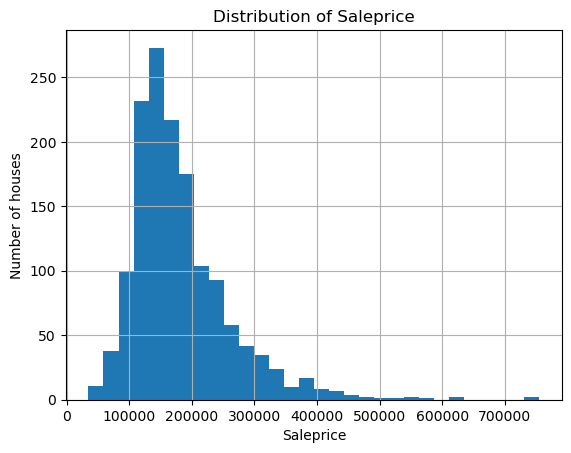

In [74]:
import matplotlib.pyplot as plt

plt.figure()
train_df["Saleprice"].hist(bins=30)
plt.title("Distribution of Saleprice")
plt.xlabel("Saleprice")
plt.ylabel("Number of houses")
plt.show()

### Target variable: Analysis

The target variable `Saleprice` represents the sale price of each property.  
Based on the summary statistics, the values fall within a limited range, which is consistent with the dataset documentation stating that the variable has been transformed.

The histogram shows how frequently different price values occur. The distribution appears fairly balanced, without extreme skew. This suggests the data is suitable for further analysis, although this will be revisited later when performing statistical tests.

### 2.2 Core feature analysis
The dataset contains a large number of features due to one-hot encoding and feature engineering. (380 columns).
For single-variable analysis, only a small number of key numeric features were selected. 
These features were chosen because they are easy to interpret and are commonly understood to influence house prices.

**Size & space**
GrLivArea (total living space)
LotArea (plot size)
TotalBsmtSF (total basement size)
GarageArea

**Quality & condition**
OverallQual (general quality rating)
OverallCond (overall property condition rating)
MasVnrArea (area of masonry to  exterior - relates to appearance and build quality)

**Age**
YearBuilt
YearRemodAdd (year last rebuilt / remodelled)

In [79]:
# # Define and describe size and space features
size_features = [
    "GrLivArea",
    "LotArea",
    "TotalBsmtSF",
    "GarageArea"
]

In [80]:
train_df[size_features].describe()

,GrLivArea,LotArea,TotalBsmtSF,GarageArea
count,1458.000000,1458.000000,1458.000000,1458.000000
mean,8.132964,14.007220,511.828686,494.462779
std,0.411543,1.147738,158.548796,180.046096
min,6.358975,10.003398,66.745939,160.000000
25%,7.836160,13.582679,403.428793,389.250000
50%,8.157270,14.088509,480.412438,479.500000
75%,8.401020,14.546361,608.206800,576.000000
max,9.577199,22.152569,1344.982594,1390.000000


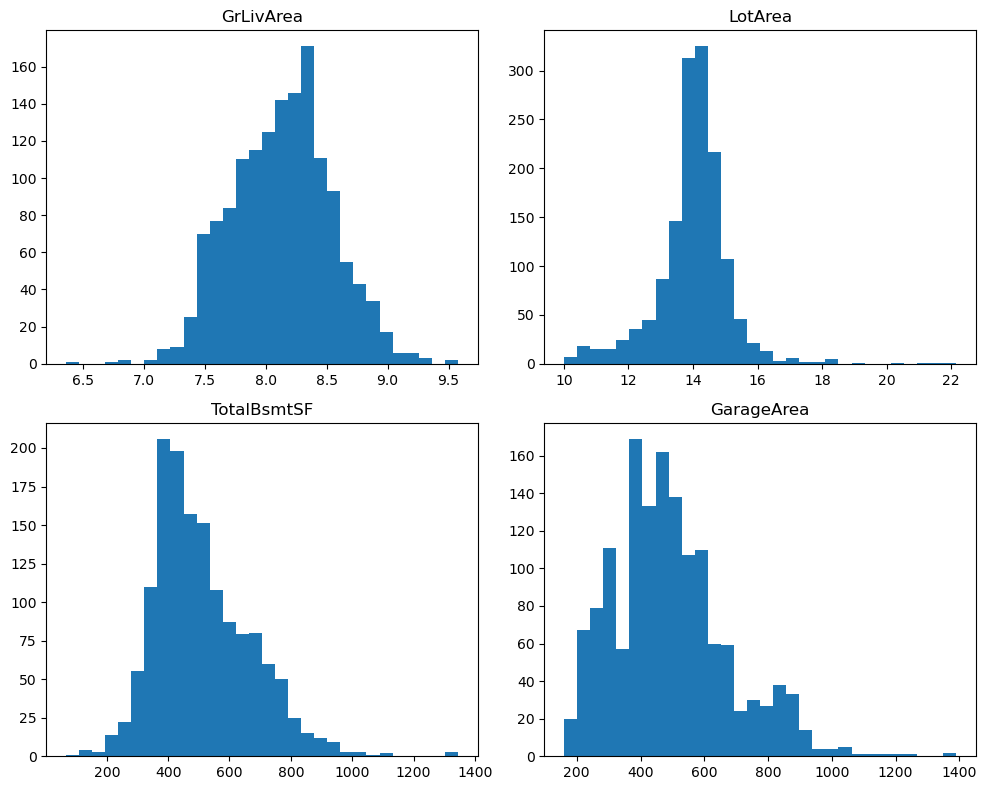

In [82]:
# Plot Size and Space features (x4)

# Create a 2x2 grid of plots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot each feature
axes[0, 0].hist(train_df["GrLivArea"], bins=30)
axes[0, 0].set_title("GrLivArea")

axes[0, 1].hist(train_df["LotArea"], bins=30)
axes[0, 1].set_title("LotArea")

axes[1, 0].hist(train_df["TotalBsmtSF"], bins=30)
axes[1, 0].set_title("TotalBsmtSF")

axes[1, 1].hist(train_df["GarageArea"], bins=30)
axes[1, 1].set_title("GarageArea")

plt.tight_layout()
plt.show()

#### Analysis: Size and space features

The size and space features show clear differences in how properties vary across the dataset.

`GrLivArea` shows that most houses have a moderate amount of living space, with fewer properties at the very large end. This suggests that extremely large homes are less common, while mid-sized homes make up most of the dataset.

`LotArea` displays a much wider spread of values. Many properties sit on relatively small or average-sized plots, but there are a small number of properties with very large lots. This indicates that plot size varies more than internal living space.

`TotalBsmtSF` shows a similar pattern to living area, where most properties have a basement of modest size and fewer homes have very large basement areas. This suggests basement space may add value but is not evenly distributed across properties.

`GarageArea` also varies, with many homes having small to medium-sized garages and fewer properties with very large garage spaces. This reflects differences in property type and available storage or parking space.

Overall, these features show noticeable variation between properties, suggesting that differences in size and space may be important factors when exploring house prices later in the analysis.


In [87]:
# Define and describe quality features
quality_features = [
    "OverallQual",
    "OverallCond",
    "MasVnrArea"
]

In [88]:
train_df[quality_features].describe()

,OverallQual,OverallCond,MasVnrArea
count,1458.000000,1458.000000,1458.000000
mean,6.093964,4.377809,40.725632
std,1.376369,0.758975,17.501338
min,1.000000,0.926401,0.804230
25%,5.000000,3.991517,22.003135
50%,6.000000,3.991517,54.598150
75%,7.000000,4.679501,54.598150
max,10.000000,6.637669,54.598150


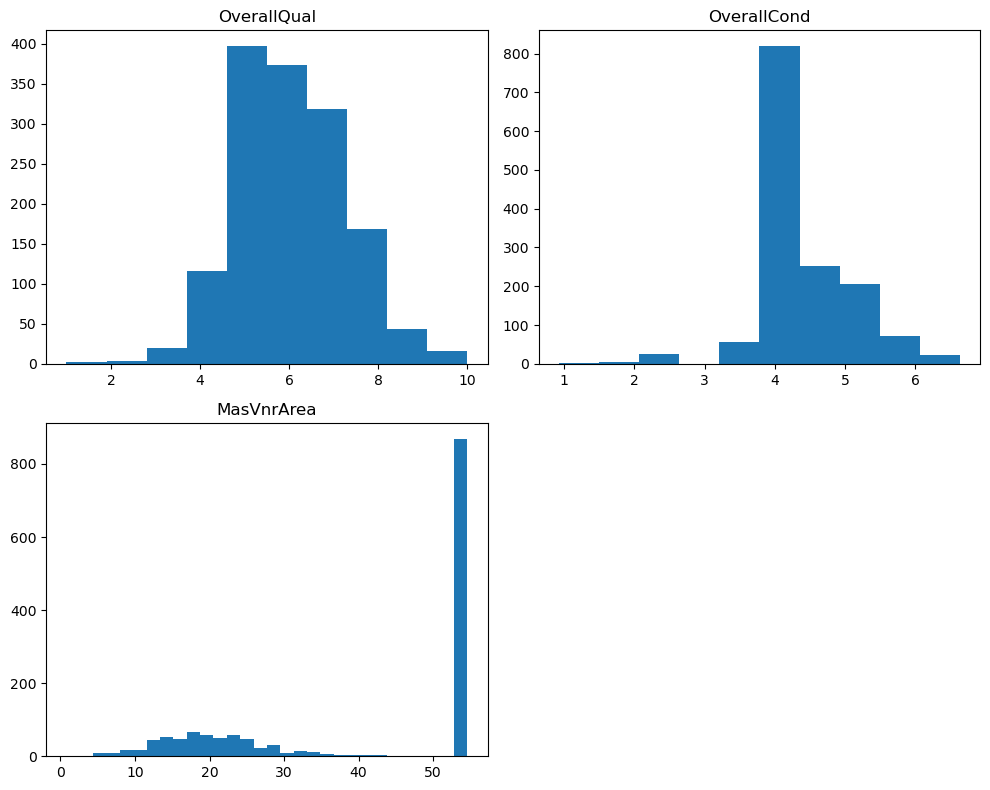

In [83]:
# Plot quality and condition features (x3)

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes[0, 0].hist(train_df["OverallQual"], bins=10)
axes[0, 0].set_title("OverallQual")

axes[0, 1].hist(train_df["OverallCond"], bins=10)
axes[0, 1].set_title("OverallCond")

axes[1, 0].hist(train_df["MasVnrArea"], bins=30)
axes[1, 0].set_title("MasVnrArea")

# Turn off the unused plot
axes[1, 1].axis("off")

plt.tight_layout()
plt.show()

#### Analysis: Quality and condition features

The quality and condition features show how well properties are built and maintained across the dataset.

`OverallQual` values are mostly concentrated in the middle to higher range of the scale. This suggests that many properties are of average to good build quality, with fewer homes at the very low or very high ends of the rating scale.

`OverallCond` shows a similar pattern, although the spread is slightly wider. This indicates that while many houses are in reasonable condition, there is more variation in how well properties have been maintained compared to overall build quality.

`MasVnrArea` shows a large number of properties with little or no masonry veneer, and a smaller number with larger veneer areas. This suggests that masonry features are not common across all houses and may reflect more decorative or higher-end property characteristics.

Overall, these features help describe differences in build quality and upkeep between properties. These differences may be useful when exploring how quality relates to sale prices later in the analysis.

In [84]:
# Define and describe age features
age_features = [
    "YearBuilt",
    "YearRemodAdd"
]

In [85]:
train_df[age_features].describe() 

,YearBuilt,YearRemodAdd
count,1458.000000,1458.000000
mean,1971.218107,1984.834019
std,30.193754,20.641760
min,1872.000000,1950.000000
25%,1954.000000,1967.000000
50%,1972.500000,1994.000000
75%,2000.000000,2004.000000
max,2010.000000,2010.000000


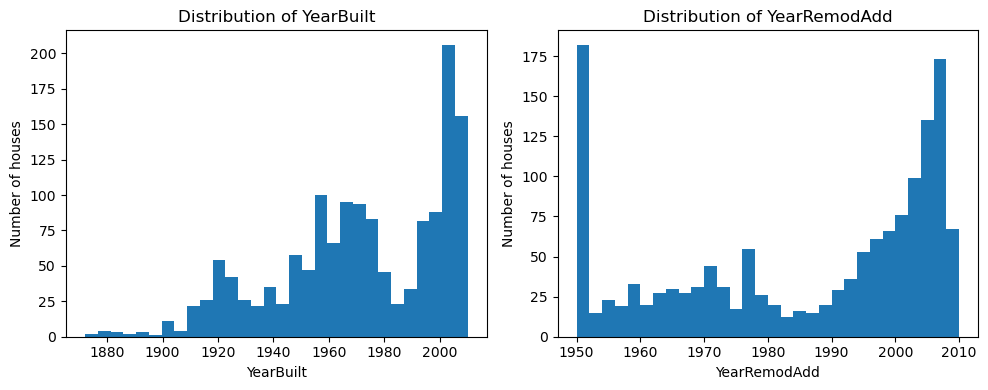

In [86]:
# Plot age-related features

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].hist(train_df["YearBuilt"], bins=30)
axes[0].set_title("Distribution of YearBuilt")
axes[0].set_xlabel("YearBuilt")
axes[0].set_ylabel("Number of houses")

axes[1].hist(train_df["YearRemodAdd"], bins=30)
axes[1].set_title("Distribution of YearRemodAdd")
axes[1].set_xlabel("YearRemodAdd")
axes[1].set_ylabel("Number of houses")

plt.tight_layout()
plt.show()

#### Analysis: Age-related features

The age-related features describe when properties were built and whether they have been updated since construction.

`YearBuilt` shows that many properties in the dataset were built during the mid to late 20th century, with fewer homes built very early or very recently. This suggests that the dataset mainly represents established housing rather than brand-new developments.

`YearRemodAdd` often matches the year the property was built, indicating that many houses have not undergone major renovations. However, there are also properties with more recent remodelling years, which suggests that some homes have been updated or improved over time.

Overall, these features provide useful context about the age and renovation history of properties. This information may be important later when exploring how newer or recently remodelled homes relate to sale prices.

### Summary of single-variable analysis

The target variable shows a compact distribution consistent with prior preprocessing. 
Size-related features vary widely across properties, particularly lot size and internal living space. 
Quality ratings are mostly concentrated in the mid-to-high range, while property age indicates that most homes are established rather than newly built.

These patterns highlight a small number of features with clear variation, making them suitable candidates for further relationship analysis.

### 2.3 Encoded categorical feature groups

The dataset contains many categorical features that have been converted into one-hot encoded columns. Analysing each encoded column individually would add unnecessary complexity and reduce clarity. Instead, related encoded features are grouped together and summarised to show how common each category is within the dataset.

Three categorical feature groups were selected for single-variable analysis: **SaleCondition**, **SaleType**, and **Neighbourhood**. These groups were chosen because they describe the circumstances and context of a property sale, including transaction type and location, rather than physical characteristics of the house.

`SaleCondition` describes the context of the sale, such as whether it was a normal sale, a family sale, or linked to new construction.  
`SaleType` describes the method used to complete the sale, such as a standard warranty deed or other transaction types.  
`Neighbourhood` represents location at an area level and acts as a proxy for factors such as desirability, access to amenities, and broader location effects.

These groups are summarised at a high level to show category prevalence. Individual encoded columns are not analysed separately at this stage and are considered later during relationship analysis and modelling.

In [89]:
# 2.31 Sale condition group

sale_condition_cols = [
    "SaleCondition_Abnorml",
    "SaleCondition_AdjLand",
    "SaleCondition_Alloca",
    "SaleCondition_Family",
    "SaleCondition_Normal",
    "SaleCondition_Partial"
]

In [90]:
# How often does each category appear?
sale_condition_counts = train_df[sale_condition_cols].sum()
sale_condition_counts

SaleCondition_Abnorml     101
SaleCondition_AdjLand       4
SaleCondition_Alloca       12
SaleCondition_Family       20
SaleCondition_Normal     1198
SaleCondition_Partial     123
dtype: int64

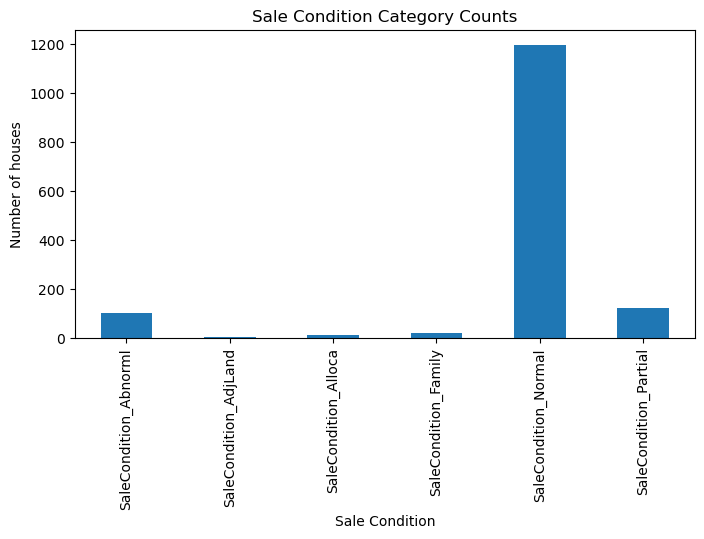

In [91]:
# plot sale condition group

plt.figure(figsize=(8, 4))
sale_condition_counts.plot(kind="bar")
plt.title("Sale Condition Category Counts")
plt.xlabel("Sale Condition")
plt.ylabel("Number of houses")
plt.show()


#### Key: Sale condition categories

The following encoded columns describe how a property was sold. Each category is represented as a binary value (1 = applies to the property, 0 = does not apply).

**SaleCondition** describes the circumstances of the sale:
- *Normal* – a standard property sale
- *Partial* – often linked to new construction or incomplete builds
- *Family* – sale between family members
- *Allocation* – sale linked to an allocation or special arrangement
- *Abnormal / Adjacent land* – less common or non-standard sale situations

### Analysis: Sale Condition categories

The sale condition categories show a clear imbalance in how often each type occurs. 
Most properties fall under the normal sale category, while alternative sale conditions appear much less frequently.

This suggests that some sale conditions are rare in the dataset and may have limited influence on overall patterns. 
These categories are considered later when exploring relationships with sale price.

Some continuous features, such as property age or quality ratings, could be grouped into ordered categories to simplify interpretation for non-technical users. This was not applied here to preserve the original feature detail during analysis.

In [92]:
# 2.32 Select Sale type group

sale_type_cols = [
    "SaleType_COD",
    "SaleType_Con",
    "SaleType_ConLD",
    "SaleType_ConLI",
    "SaleType_ConLw",
    "SaleType_New",
    "SaleType_Oth",
    "SaleType_WD"
]

In [94]:
# How often each sale type appear?

sale_type_counts = train_df[sale_type_cols].sum()
sale_type_counts

SaleType_COD        43
SaleType_Con         2
SaleType_ConLD       9
SaleType_ConLI       5
SaleType_ConLw       5
SaleType_New       120
SaleType_Oth         3
SaleType_WD       1267
dtype: int64

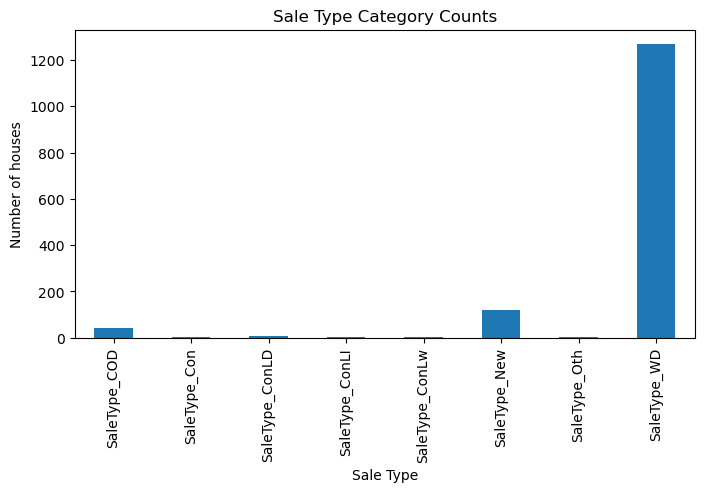

In [95]:
# plot sale type group

plt.figure(figsize=(8, 4))
sale_type_counts.plot(kind="bar")
plt.title("Sale Type Category Counts")
plt.xlabel("Sale Type")
plt.ylabel("Number of houses")
plt.show()

#### Key: Sale type categories

**SaleType** describes the method used to complete the sale:
- *WD (Warranty Deed)* – the most common and standard sale type
- *New* – sale of a newly built property
- *Contract-based types* – alternative sale arrangements (e.g. contract low or high interest)
- *Other* – rare or less common sale methods

### Analysis: Sale type categories
The sale type categories show a clear imbalance in how properties are sold. 
Most properties were sold using a standard warranty deed, while other sale types occur far less frequently.

This suggests that alternative sale methods are relatively rare in the dataset. 
These differences are noted and explored later when examining how sale type may relate to sale prices.

In [126]:
# 2.33 Explore Neighbourhood group

# create readable table of neighbourhood counts
neighbourhood_df = (
    neighbourhood_counts
    .reset_index()
    .rename(columns={"index": "Neighbourhood", 0: "PropertyCount"})
)

# remove the 'Neighborhood_' prefix
neighbourhood_df["Neighbourhood"] = neighbourhood_df["Neighbourhood"].str.replace(
    "Neighborhood_", "", regex=False
)

neighbourhood_df

,Neighbourhood,PropertyCount
0,NAmes,225
1,CollgCr,150
2,OldTown,113
3,Edwards,98
4,Somerst,86
5,Gilbert,79
6,NridgHt,77
7,Sawyer,74
8,NWAmes,73
9,SawyerW,59


In [127]:
len(neighbourhood_df)

25

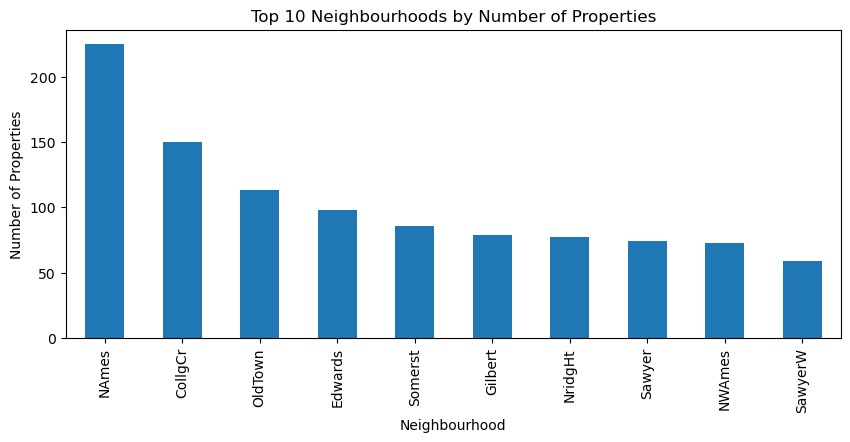

In [128]:
# Top 10 Neighbourhoods by number of properties

neighbourhood_df.head(10).set_index("Neighbourhood")["PropertyCount"].plot(
    kind="bar",
    figsize=(10, 4)
)

plt.title("Top 10 Neighbourhoods by Number of Properties")
plt.xlabel("Neighbourhood")
plt.ylabel("Number of Properties")

plt.show()

**Note** Neighbourhood values are represented using standard Ames housing codes (e.g. NAmes for North Ames), which correspond to distinct geographic areas within the city.

### Summary of single-variable analysis

The target variable shows a compact distribution consistent with prior preprocessing. 
Core numeric features related to size, quality, and age display clear variation across properties, while quality ratings tend to cluster around average to good values. 
Encoded sale condition and sale type categories are highly imbalanced, with most properties sold through standard sale arrangements.

These findings highlight a small number of features with meaningful variation and provide a clear foundation for exploring relationships between property characteristics and sale prices in the next section.

## 3. RELATIONSHIP ANALYSIS 

In this section, selected features are compared with the target variable (`Saleprice`) to explore whether changes in property characteristics are associated with changes in sale price. The focus is on identifying clear patterns and relationships using simple visualisations, rather than making predictions or causal claims.

### 3.1 Size vs Saleprice

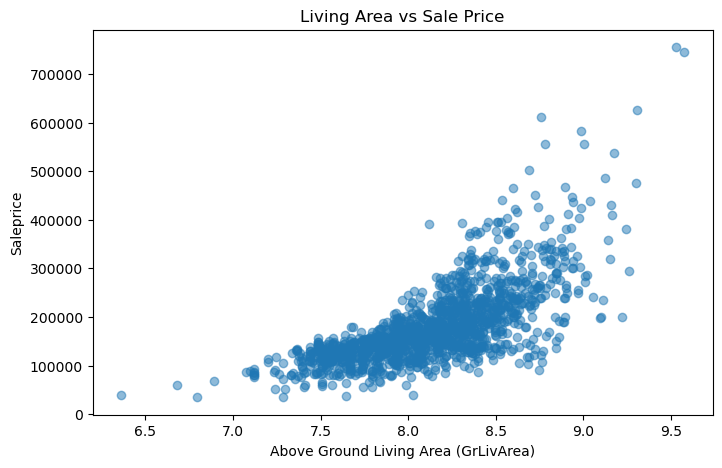

In [96]:
# 3.11 GrLivArea vs Saleprice

plt.figure(figsize=(8, 5))
plt.scatter(train_df["GrLivArea"], train_df["Saleprice"], alpha=0.5)

plt.title("Living Area vs Sale Price")
plt.xlabel("Above Ground Living Area (GrLivArea)")
plt.ylabel("Saleprice")

plt.show()

### Relationship between living area and sale price

The scatter plot shows a strong and consistent positive relationship between above-ground living area and sale price.

As living area increases, sale price increases in a clear and almost linear pattern, particularly across the central range of the data. Smaller houses are concentrated at lower sale prices, while larger houses are consistently associated with higher prices.

Although some variation exists at higher living area values, the overall spread is relatively narrow compared to lot area. This indicates that living area explains a substantial portion of the variation in sale prices and is likely to be one of the most influential features in the dataset.

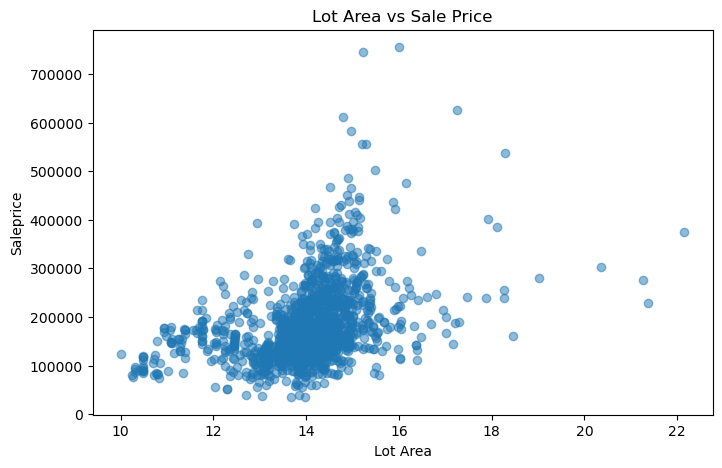

In [97]:
# 3.12 Lot size vs sale price

plt.figure(figsize=(8, 5))
plt.scatter(train_df["LotArea"], train_df["Saleprice"], alpha=0.5)

plt.title("Lot Area vs Sale Price")
plt.xlabel("Lot Area")
plt.ylabel("Saleprice")

plt.show()

In [118]:
# Median Saleprice by lot size band (small / medium / large)

# Create lot size bands
train_df["LotArea_band"] = pd.qcut(
    train_df["LotArea"],
    q=3,
    labels=["Small lot", "Medium lot", "Large lot"]
)

In [119]:
# calculate median sale price by lot size band
median_price_by_lot_band = train_df.groupby("LotArea_band")["Saleprice"].median()

C:\Users\Surface\AppData\Local\Temp\ipykernel_18308\719740593.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_price_by_lot_band = train_df.groupby("LotArea_band")["Saleprice"].median()


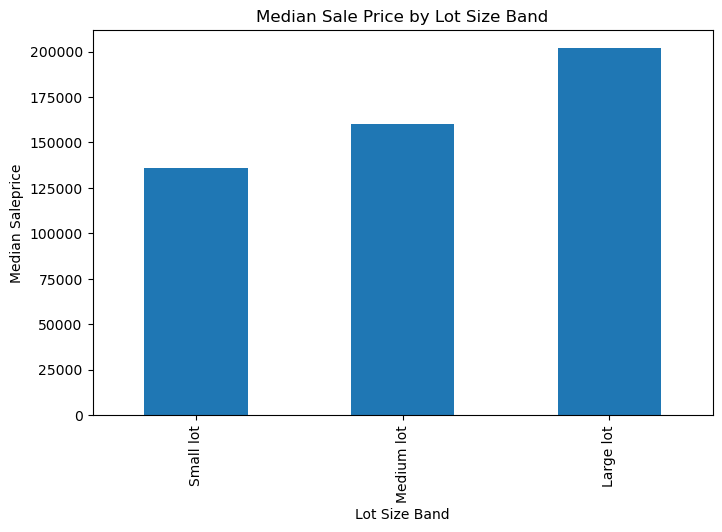

In [120]:
plt.figure(figsize=(8, 5))

median_price_by_lot_band.plot(kind="bar")

plt.title("Median Sale Price by Lot Size Band")
plt.xlabel("Lot Size Band")
plt.ylabel("Median Saleprice")

plt.show()

### Lot area compared to living space - relationships to Sale Price

Analysis of both the scatter plot and the median sale price by lot size band shows that lot area has a weaker relationship with sale price than internal living space.

While sale prices increase slightly as lot size increases, the effect is modest and inconsistent. Properties with similar lot sizes sell across a wide range of prices, and very large plots do not reliably correspond to higher sale prices. Aggregated results confirm this pattern, with only small differences in median sale price between small, medium, and large lot size bands.

In contrast, living space shows a much stronger and more consistent relationship with sale price. This suggests that buyers place greater value on usable internal space than on plot size alone.

One likely explanation is the influence of location. Properties in urban or suburban areas often have smaller plots but command higher prices due to demand, amenities, and proximity to services. Conversely, rural properties may sit on larger plots but achieve lower prices if location and accessibility are less desirable.

Overall, these findings indicate that internal living space is a more important driver of sale price than lot area, and that lot size should be interpreted in context rather than treated as a primary indicator of value.

### 3.2 Quality & condition vs Sale price

<Figure size 1000x500 with 0 Axes>

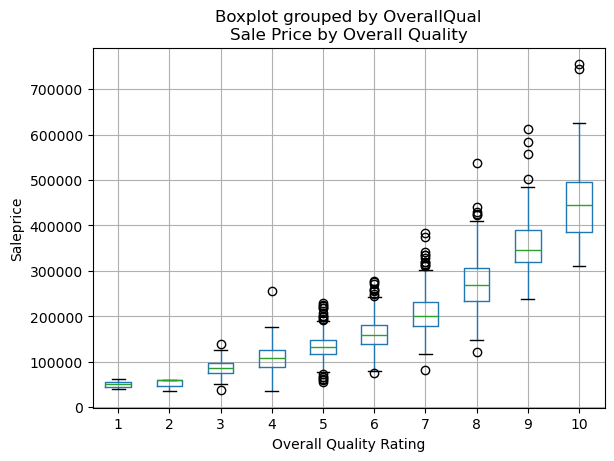

In [101]:
# 3.21 Overall quality vs sale price

plt.figure(figsize=(10, 5))
train_df.boxplot(column="Saleprice", by="OverallQual")

plt.title("Sale Price by Overall Quality")
plt.xlabel("Overall Quality Rating")
plt.ylabel("Saleprice")

plt.show()

#### (a) Overall quality vs sale price (with outliers)

When outliers are included, the box plot shows a strong positive relationship between overall quality rating and sale price. Higher quality levels are associated with higher median sale prices and a wider spread of values.

The presence of outliers is most noticeable at higher quality ratings, where a small number of properties achieve exceptionally high sale prices. This suggests that premium properties can vary substantially in value, but these extreme cases may obscure the typical price range for each quality level.

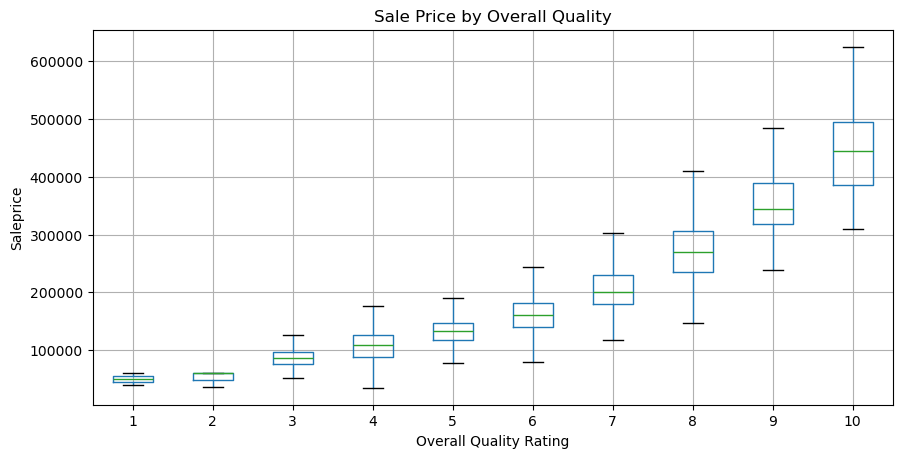

In [102]:
# Remove outliers for clearer interpretation

train_df.boxplot(
    column="Saleprice",
    by="OverallQual",
    figsize=(10, 5),
    showfliers=False
)

plt.title("Sale Price by Overall Quality")
plt.suptitle("")
plt.xlabel("Overall Quality Rating")
plt.ylabel("Saleprice")

plt.show()


#### (b) Overall quality vs sale price (without outliers)

When outliers are removed, the underlying pattern becomes clearer. Median sale prices increase steadily with each rise in overall quality rating, and the separation between quality levels is more visually distinct.

This view highlights the typical sale price ranges for different quality levels and confirms that overall quality is strongly associated with higher sale prices across the majority of properties, independent of extreme values.

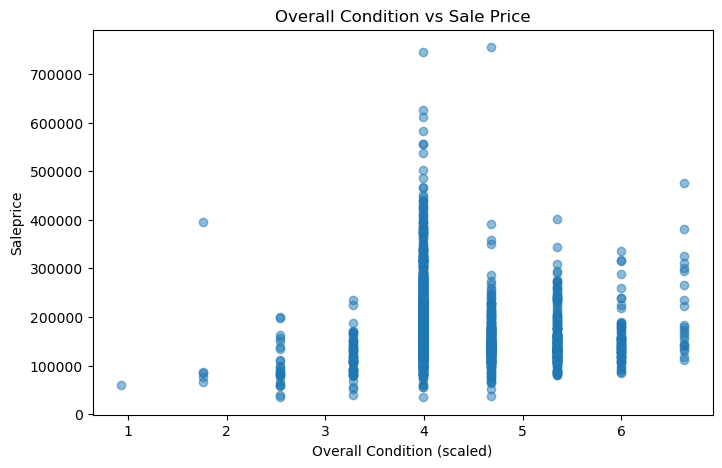

In [106]:
# 3.22 Overall condition vs sale price

plt.figure(figsize=(8, 5))
plt.scatter(train_df["OverallCond"], train_df["Saleprice"], alpha=0.5)

plt.title("Overall Condition vs Sale Price")
plt.xlabel("Overall Condition (scaled)")
plt.ylabel("Saleprice")

plt.show()

### Relationship between overall condition and sale price

The scatter plot shows a weak and inconsistent relationship between overall condition and sale price.

Sale prices vary widely across similar condition values, with no clear upward trend as condition increases. Properties with mid-range condition scores appear across almost the full range of sale prices, indicating that condition alone does not strongly distinguish between lower- and higher-priced homes.

A small number of high-priced outliers occur at moderate condition levels, suggesting that other factors such as living area, build quality, or location play a more significant role in determining sale price than overall condition in its current scaled form.

### 3.3 Age vs Sale Price

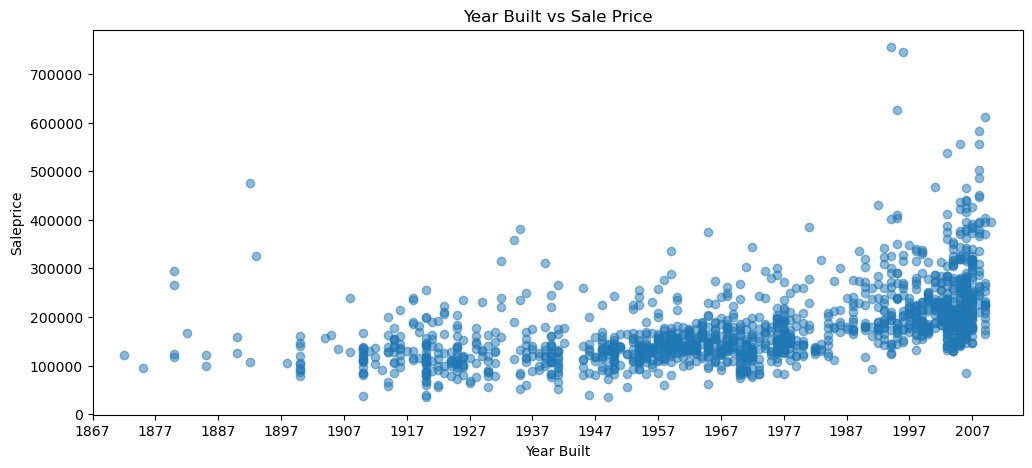

In [112]:
# 3.31 Year built vs sale price

min_year = train_df["YearBuilt"].min()
max_year = train_df["YearBuilt"].max()

plt.figure(figsize=(12, 5))

plt.scatter(train_df["YearBuilt"], train_df["Saleprice"], alpha=0.5)

plt.title("Year Built vs Sale Price")
plt.xlabel("Year Built")
plt.ylabel("Saleprice")

# add padding either side of the data range for clearer view
plt.xlim(min_year - 5, max_year + 5)

# add year ticks every 10 years
plt.xticks(range(int(min_year - 5), int(max_year + 6), 10))

plt.show()

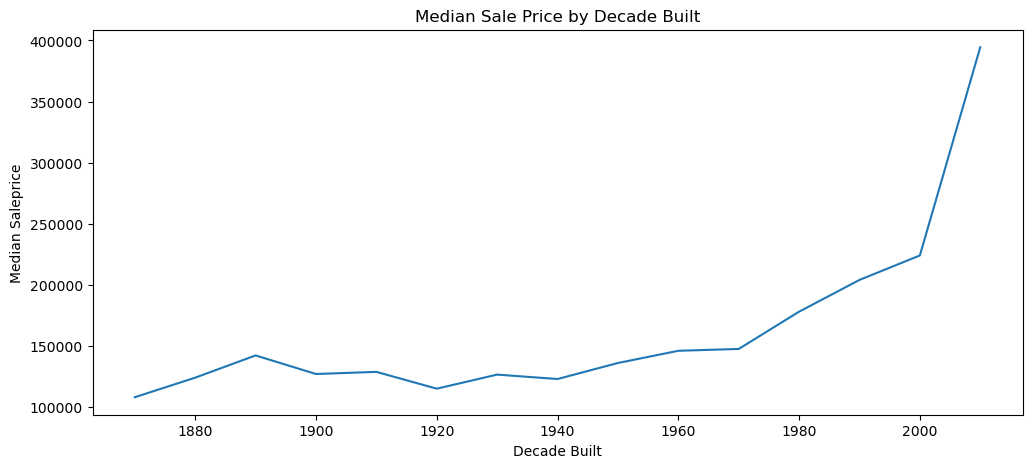

In [116]:
# View data by median sale price per decade built

# Create decade bins
train_df["DecadeBuilt"] = (train_df["YearBuilt"] // 10) * 10

# Calculate median sale price for each decade
median_price_by_decade = train_df.groupby("DecadeBuilt")["Saleprice"].median()

# Plot median sale price by decade built
plt.figure(figsize=(12, 5))

plt.plot(
    median_price_by_decade.index,
    median_price_by_decade.values
)

plt.title("Median Sale Price by Decade Built")
plt.xlabel("Decade Built")
plt.ylabel("Median Saleprice")

plt.show()

### Relationship between year built and sale price

The scatter plot shows that higher sale prices are more frequently observed among newer properties. However, this pattern should be interpreted with care.

More recent construction years contain a larger number of observations, reflecting greater availability of newer properties in the dataset. As a result, higher prices may appear more common simply because more newer homes are represented, rather than because age alone determines value.

**While newer properties tend to achieve higher prices on average, this relationship likely reflects a combination of factors, including modern building standards, larger living areas, and higher overall quality, rather than construction year in isolation**.

### Median sale price by decade built

The line chart shows a clear increase in median sale price for properties built in more recent decades. Older decades are associated with lower typical sale prices, while homes built in later decades tend to achieve higher median prices.

Using median values reduces the influence of extreme prices and highlights a smoother long-term trend than the raw scatter plot. This suggests that construction period is an important contextual factor in sale prices, although it likely reflects a combination of related features such as size, quality, and modern building standards rather than age alone.

In [114]:
# 3.32 Year remodelled vs sale price

# aggregate by year of remodelling / rebuilding
avg_price_by_remod = (
    train_df
    .groupby("YearRemodAdd")["Saleprice"]
    .mean()
)

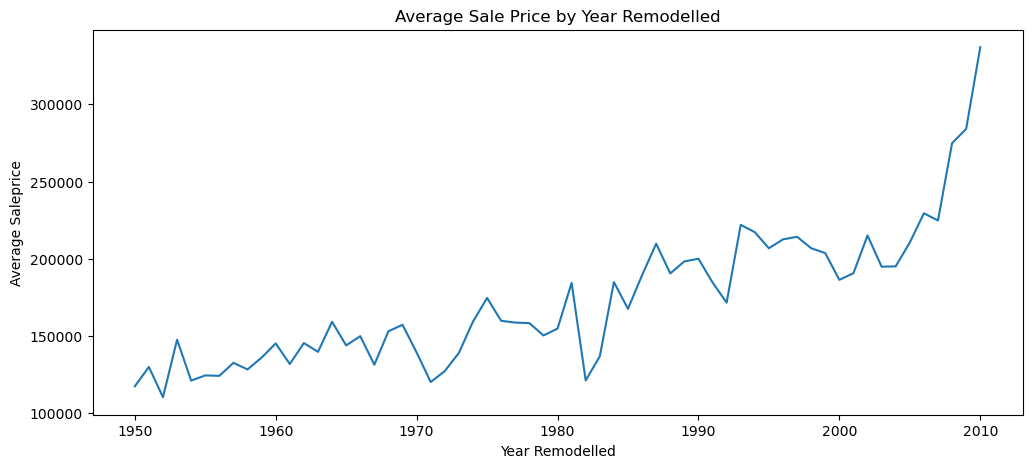

In [115]:
# plot av. sales price by remodelling year

plt.figure(figsize=(12, 5))

plt.plot(
    avg_price_by_remod.index,
    avg_price_by_remod.values
)

plt.title("Average Sale Price by Year Remodelled")
plt.xlabel("Year Remodelled")
plt.ylabel("Average Saleprice")

plt.show()

### Relationship between year remodelled and sale price

The line chart shows that average sale prices tend to increase for more recently remodelled properties. Earlier remodelling years are associated with lower average prices, while more recent years generally show higher average sale prices.

While the trend is not perfectly smooth, this aggregated view highlights a clearer upward pattern than a previous scatter plot tried. This suggests that more recent remodelling is associated with higher sale prices on average, although individual property prices still vary widely.

### 3.4 Neighbourhood vs Sale Price

This dataset originates from Ames, Iowa (United States). It does not include precise geographic coordinates due to privacy and ethical considerations. Instead, location is represented using neighbourhood categories, which act as a proxy for area desirability, local amenities and broader location effects.

At this stage, neighbourhood features are not analysed in detail. The purpose here is simply to assess whether sale prices vary meaningfully across neighbourhoods. A more detailed treatment of location is deferred to the modelling stage.

In [129]:
# 3.4 Neighbourhood VS sale price

# get top 10 neighbourhoods by frequency
top_neighbourhoods = neighbourhood_counts.head(10).index

# filter dataframe to those neighbourhoods
neighbourhood_mask = train_df[top_neighbourhoods].sum(axis=1) == 1
neighbourhood_df = train_df.loc[neighbourhood_mask].copy()

# create a single neighbourhood column
neighbourhood_df["Neighbourhood"] = (
    neighbourhood_df[top_neighbourhoods]
    .idxmax(axis=1)
    .str.replace("Neighborhood_", "", regex=False)
)

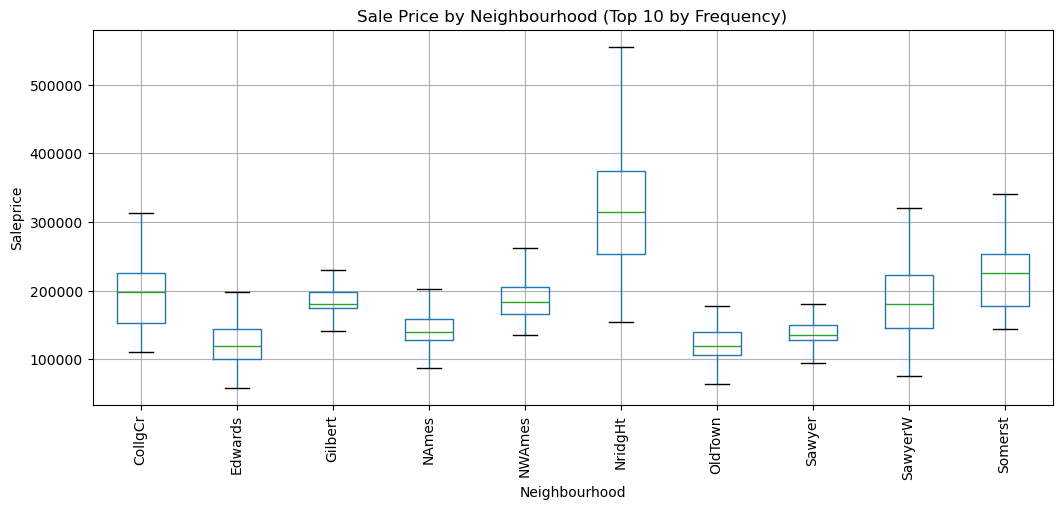

In [130]:
neighbourhood_df.boxplot(
    column="Saleprice",
    by="Neighbourhood",
    figsize=(12, 5),
    showfliers=False
)

plt.title("Sale Price by Neighbourhood (Top 10 by Frequency)")
plt.suptitle("")
plt.xlabel("Neighbourhood")
plt.ylabel("Saleprice")
plt.xticks(rotation=90)

plt.show()

### Relationship between neighbourhood and sale price

The box plot shows clear variation in sale prices across neighbourhoods. Median sale prices differ substantially between areas, with some neighbourhoods consistently associated with higher typical prices than others.

The spread of prices also varies by neighbourhood, indicating that location influences both typical property value and price variability. Compared to lot size, neighbourhood shows much stronger differentiation in sale prices.

This confirms that location plays a meaningful role in house prices. A more detailed assessment of neighbourhood effects, including their interaction with other features, is explored during the modelling stage.

### Summary of relationship analysis (highest importance first)

- **Neighbourhood (location)** shows the strongest relationship with sale price. Median sale prices vary substantially across neighbourhoods, confirming that location is a major driver of property value.

- **Internal living space (`GrLivArea`)** has a strong and consistent positive relationship with sale price. Properties with larger usable living areas tend to achieve higher prices across the dataset.

- **Overall quality (`OverallQual`)** demonstrates clear separation in sale prices across quality levels, indicating that build quality and finish are key contributors to value.

- **Age-related features (`YearBuilt`, `YearRemodAdd`)** show an upward trend, with newer and more recently remodelled properties more frequently associated with higher sale prices. However, wide variation within age groups suggests that age alone does not determine value.

- **Lot size (`LotArea`)** has a weaker and less consistent relationship with sale price. Larger plots are associated with only modest increases in typical sale price, likely reflecting the moderating effect of location.

- **Overall condition (`OverallCond`)** shows the weakest standalone relationship with sale price, with substantial overlap in prices across condition levels.

These findings provide a clear rationale for prioritising location, living space, and overall quality in the modelling stage.

## 4.0 STATISTICAL SUMMARY

In [135]:
# statistical summary for all numeric features explored in this notebook
features_explored = [
    "Saleprice",
    "GrLivArea",
    "LotArea",
    "TotalBsmtSF",
    "GarageArea",
    "MasVnrArea",
    "OverallQual",
    "OverallCond",
    "YearBuilt",
    "YearRemodAdd"
]

train_df[features_explored].describe().round(2)

,Saleprice,GrLivArea,LotArea,TotalBsmtSF,GarageArea,MasVnrArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd
count,1458.00,1458.00,1458.00,1458.00,1458.00,1458.00,1458.00,1458.00,1458.00,1458.00
mean,180933.92,8.13,14.01,511.83,494.46,40.73,6.09,4.38,1971.22,1984.83
std,79495.06,0.41,1.15,158.55,180.05,17.50,1.38,0.76,30.19,20.64
min,34901.00,6.36,10.00,66.75,160.00,0.80,1.00,0.93,1872.00,1950.00
25%,129926.00,7.84,13.58,403.43,389.25,22.00,5.00,3.99,1954.00,1967.00
50%,163001.00,8.16,14.09,480.41,479.50,54.60,6.00,3.99,1972.50,1994.00
75%,214001.00,8.40,14.55,608.21,576.00,54.60,7.00,4.68,2000.00,2004.00
max,755001.00,9.58,22.15,1344.98,1390.00,54.60,10.00,6.64,2010.00,2010.00


### Interpretation of statistical summary

- **Saleprice** shows a wide spread and a higher mean than median, indicating right-skewness and the presence of high-value outliers.
- **Living space (GrLivArea)** and **basement size (TotalBsmtSF)** show substantial variation, supporting their importance as price drivers.
- **OverallQual** spans the full rating range, reinforcing its strong role in differentiating property values.
- **Age-related features** (YearBuilt and YearRemodAdd) cover multiple decades, supporting age-based analysis but indicating that age alone does not determine sale price.
- Overall, the statistics provide numeric support for patterns observed in earlier analysis and help prioritise features for modelling.

## Next steps

- Location (neighbourhood), internal living space, and overall quality emerge as the most influential features associated with sale price.
- The next stage of the project transitions from exploration to prediction.
- **Notebook 02** focuses on:
  - preparing features for modelling  
  - training baseline and machine learning models  
  - evaluating model performance  
  - assessing feature importance to quantify relationships identified here.